# Chapter 3: Forest Fires

<img src="FF_fig_01.jpg" alt="title" width="600px" />

## Motivation

**Forest fires**: an example of self-organized critical system.

**Self-organized criticality**: property of dynamical systems that have a critical point as an attractor.

Display of scale-invariance as in a critical point of a phase transition without having to fine-tune the control papameters.

*The system tunes itself towards criticality.*


**Notes**:
- Self-organized criticality is thought to be relevant for the emergence of complexity in nature. 


**Related topics**:
- Fractals, scale invariance, power laws, critical phenomena.
- Cellular automata and Game of life (complexity emerges from simple local interactions).


### Self-organized systems in nature

<img src="FF_fig_02.jpg" alt="title" width="600px" />

- Sandpiles (Bak, Tang, Wiesenfeld)

- Forest fires

- Earthquake (magnitude; frequency of aftershocks)

- Fluctuations in economic systems (e.g., financial markets, ...)

- Brain activity (neuronal avalanches in the cortex)

- Stellar flares

## Application example 1: Power-Law Scaling in the Brain Surface Electric Potential


[Power-Law Scaling in the Brain Surface Electric Potential](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000609)

<img src="FF_fig_03.png" alt="title" width="600px" />

## Application example 2: Self-organized Criticality in Stellar Flares


[Self-organized Criticality in Stellar Flares](https://iopscience.iop.org/article/10.3847/1538-4357/abdec7)

<img src="FF_fig_04.png" alt="title" width="600px" />

## Forest fires

<img src="FF_fig_05.png" alt="title" width="600px" />

Forest: Square lattice $N \times N$, initially empty. 

Each cell of the lattice can host a tree. 

Each round: trees can grow in the forest (probability: $p$) and a lightning can hit (probability: $f$).

If the lightning hits a cell with a tree, it ignites a fire event.

The fire:
- propagates to the neighboring cells (von Neumann neighborhood) that are occupied by a tree. 

- is propagated to the neighbours recursively. 

- cannot propagate to empty cells or cells that were already ignited. 

- stops when it doesn't find any more tree to burn.

After the fire stops, the size of the fire is calculated by counting the total number of trees burned during the propagation.

## Simulation of Forest Fires

In the simulation, we indicate with:

$0$ : an empty cell

$1$ : cell with a tree

$-1$ : cell on fire during the fire event (will turn $0$ at the end of the round)



### Function growing the trees in the forest

Implement a function to grow trees in the forest according to the probability $p$.

In [8]:
import numpy as np 
    
def grow_trees(forest, p):
    """
    Function to pgrow new trees in the forest.
    
    Parameters
    ==========
    forest : 2-dimensional array.
    p : Probability for a tree to be generated in an empty cell.
    """
    
    Ni, Nj = forest.shape  # Dimensions of the forest.
    
    new_trees = np.random.rand(Ni, Nj)

    new_trees_indices = np.where(new_trees <= p)
    forest[new_trees_indices] = 1
    
    return forest

### Function propagating the fire

Implement a function to propagate the fire on a populated forest.

Uses von Neumann neighborhood for the propagation.

Algorithm:

1. We start from the cell hit by the lighgtning.
2. If it hosts a tree, we set it on fire (cell set to $-1$) and then move to check the neighbours up, left, down, right.
3. We track the coordinates of the adjacent cells *catching fire* in a list. 
4. We reiterate the process (steps 2-4) for each of the cells in the list, until the list of cells to check is empty (i.e., the fire stops propagating).

In [9]:
def propagate_fire(forest, i0, j0):
    """
    Function to propagate the fire on a populated forest.
    
    Parameters
    ==========
    forest : 2-dimensional array.
    i0 : First index of the cell where the fire occurs.
    j0 : Second index of the cell where the fire occurs.
    """
    
    Ni, Nj = forest.shape  # Dimensions of the forest.

    fs = 0  # Initialize fire size.

    if forest[i0, j0] == 1:
        active_i = [i0]  # Initialize the list.
        active_j = [j0]  # Tnitialize the list. 
        forest[i0, j0] = -1  # Sets the tree on fire.
        fs += 1  # Update fire size.
        
        while len(active_i) > 0:
            next_i = []
            next_j = []
            for n in np.arange(len(active_i)):
                # Coordinates of cell up.
                i = (active_i[n] + 1) % Ni
                j = active_j[n]
                # Check status
                if forest[i, j] == 1:
                    next_i.append(i)  # Add to list.
                    next_j.append(j)  # Add to list.
                    forest[i, j] = -1  # Sets the current tree on fire.
                    fs += 1  # Update fire size.

                # Coordinates of cell down.
                i = (active_i[n] - 1) % Ni
                j = active_j[n]
                # Check status
                if forest[i, j] == 1:
                    next_i.append(i)  # Add to list.
                    next_j.append(j)  # Add to list.
                    forest[i, j] = -1  # Sets the current tree on fire.
                    fs += 1  # Update fire size.

                # Coordinates of cell left.
                i = active_i[n]
                j = (active_j[n] - 1) % Nj
                # Check status
                if forest[i, j] == 1:
                    next_i.append(i)  # Add to list.
                    next_j.append(j)  # Add to list.
                    forest[i, j] = -1  # Sets the current tree on fire.
                    fs += 1  # Update fire size.

                # Coordinates of cell right.
                i = active_i[n]
                j = (active_j[n] + 1) % Nj
                # Check status
                if forest[i, j] == 1:
                    next_i.append(i)  # Add to list.
                    next_j.append(j)  # Add to list.
                    forest[i, j] = -1  # Sets the current tree on fire.
                    fs += 1  # Update fire size.

            active_i = next_i
            active_j = next_j        
            
    return fs, forest

### Simulation

Initialize the system

In [11]:
N = 100  # Side of the forest.
p = 0.01  # Growth probability.
f = 0.2  # Lightning strike probability.

forest = np.zeros([N, N])  # Empty forest.
fire_size = []  # Empty list of fire sizes.

Let's run the simulation (visualization every time step)

In [13]:
import time
from tkinter import *

Ni, Nj = forest.shape  # Sets the variables describing the shape.

N_skip = 1 # Visualize status every N_skip steps. 

window_size = 600

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:

    forest = grow_trees(forest, p)  # Grow new trees.
    
    p_lightning = np.random.rand()
    if p_lightning < f:  # Lightning occurs.
        i0 = np.random.randint(Ni)
        j0 = np.random.randint(Nj)
        
        fs, forest = propagate_fire(forest, i0, j0)
        if fs > 0:
            fire_size.append(fs) 
        
    # Update animation frame.
    if step % N_skip == 0:        
        canvas.delete('all')
        trees = []
        for i in range(Ni):
            for j in range(Nj):
                tree_color = '#00AA40' if forest[i, j] == 1 \
                else '#FF0000' if forest[i, j] == -1 else '#FFFFFF'
                trees.append(
                    canvas.create_rectangle(
                        j / Nj * window_size, 
                        i / Ni * window_size,
                        (j + 1) / Nj * window_size, 
                        (i + 1) / Ni * window_size,
                        outline='', 
                        fill=tree_color,
                    )
                )
        
        tk.title(f'Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(0.001)  # Increase to slow down the simulation.

    step += 1
    
    forest[np.where(forest == -1)] = 0

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).

TclError: invalid command name ".!canvas"

Let's run the code without visualization to generate enough data for the fire sizes

In [ ]:
N = 100  # Side of the forest.
p = 0.01  # Growth probability.
f = 0.2  # Lightning strike probability.
target_num_fires = 300

forest = np.zeros([N, N])  # Empty forest.
fire_size = []  # Empty list of fire sizes.
fire_history = []  # Empty list of fire history.

num_fires = 0
while num_fires < target_num_fires:

    forest = grow_trees(forest, p)  # Grow new trees.
    
    p_lightning = np.random.rand()
    if p_lightning < f:  # Lightning occurs.
        i0 = np.random.randint(Ni)
        j0 = np.random.randint(Nj)
        
        fs, forest = propagate_fire(forest, i0, j0)
        if fs > 0:
            fire_size.append(fs) 
            num_fires += 1 
            
        fire_history.append(fs)
        
    else:
        fire_history.append(0)

    forest[np.where(forest == -1)] = 0

print(f'Target of {target_num_fires} fire events reached')


Target of 325 fire events reached


Let's plot the fire complete history as a function of time.

In this we include also the time steps where no fire occurs.

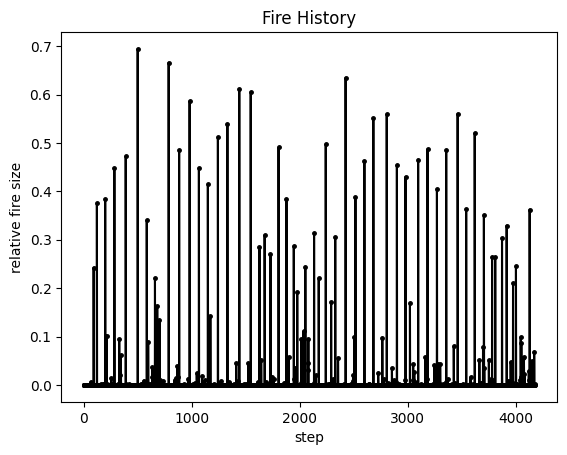

In [16]:
from matplotlib import pyplot as plt

t = np.array(np.arange(len(fire_history)))
fh = np.array(fire_history) / forest.size

plt.plot(t, fh, '.-', color='k', markersize=5)

plt.title('Fire History')

plt.xlabel('step')
plt.ylabel('relative fire size')

plt.show()

Let's focus on the **fires** only.

We start with plotting a histogram (experimental probability distribution)

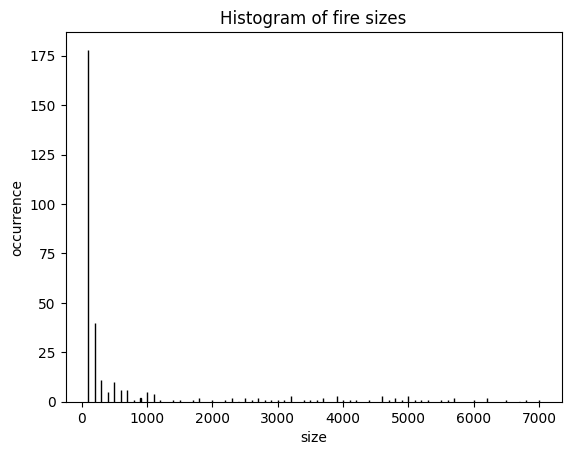

In [17]:
max_fire_size = max(fire_size)

bin_width = 100

bins_edges = (np.arange(0, max_fire_size + bin_width, bin_width) 
              - 0.5 * bin_width)
bins = bins_edges[1:] + 0.5 * bin_width

occurrence = np.histogram(fire_size, bins=bins_edges)

plt.bar(bins, occurrence[0], color='r', width=0.4, edgecolor='k')

plt.title('Histogram of fire sizes')

plt.xlabel('size')
plt.ylabel('occurrence')

plt.show()

The histogram, or the empirical **probability distribution**, is not the best way to visualize the data in this case.

The behaviour is captured better using the empirical **complementary cumulative distribution function**

### Complementary Cumulative Distribution Function

If we have a probability distribution $p(m)$, the **complementary cumulative distribution function** is defined as:

$$
    C(n) = \sum_{m=n}^{+\infty} p(m) 
$$

Let's implement a function that, given the sequence of fire events, returns the empirical complementary cumulative distribution function.

In [19]:
def complementary_CDF(f, f_max):
    """
    Function to return the complementary cumulative distribution function.
    
    Parameters
    ==========
    f : Sequence of values (as they occur, non necessarily sorted).
    f_max : Integer. Maximum possible value for the values in f. 
    """
    
    num_events = len(f)
    s = np.sort(np.array(f)) / f_max  # Sort f in ascending order.
    c = np.array(np.arange(num_events, 0, -1)) / (num_events)  # Descending.
    
    c_CDF = c
    s_rel = s

    return c_CDF, s_rel

Let's check the complementary cumulative distribution function for our data.

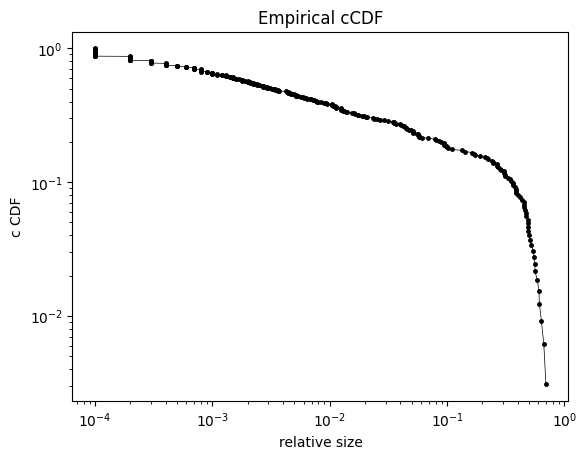

In [20]:
c_CDF, s_rel = complementary_CDF(fire_size, forest.size)

# Note loglog plot!
plt.loglog(s_rel, c_CDF, ".-", color='k', markersize=5, linewidth=0.5)

plt.title('Empirical cCDF')

plt.xlabel('relative size')
plt.ylabel('c CDF')

plt.show()

### Comparison with randomly grown forests

Let's compare the size of the fires in the fire-grown forest with a randomly grown forest of the same size (i.e., the same number of trees)

To do that, we write a function that generates a random forest with a given numbers of trees.

In [21]:
import random

def random_forest(Ni, Nj, T):
    """
    Function to return a randomly grown forest.
    Returns also the coordinates of the random ignition point.
    
    Parameters
    ==========
    Ni : First dimension of the forest array.
    Nj : Second dimension of the forest array.
    T : Integer. Number of trees in the forest. 
    """
    
    rf = np.zeros([Ni, Nj])
    
    nt = random.sample(range(Ni * Nj), T)
    i_list = list(map(lambda x: x % Ni, nt)) 
    j_list = list(map(lambda x: x // Ni, nt))
    
    rf[i_list, j_list] = 1
    
    ignition = np.random.randint(T)
    i_fire = i_list[ignition]
    j_fire = j_list[ignition]
    
    return rf, i_fire, j_fire

Let's run a simulation where we compare the fire sizes in fire-grown forest and random grown forest.

In [22]:
N = 100  # Side of the forest.
p = 0.01  # Growth probability.
f = 0.2  # Lightning strike probability.
target_num_fires = 300  

forest = np.zeros([N, N])  # Empty forest.
fire_size = []  # Empty list of fire sizes for the fire-grown forest.
rf_fire_size = []  # Empty list of fire history for the random forest.

num_fires = 0
Ni, Nj = forest.shape

while num_fires < target_num_fires:

    forest = grow_trees(forest, p)  # Grow new trees.
    
    p_lightning = np.random.rand()
    if p_lightning < f:  # Lightning occurs.
        i0 = np.random.randint(Ni)
        j0 = np.random.randint(Nj)
        
        T = int(np.sum(forest)) # Current number of trees.
        
        fs, forest = propagate_fire(forest, i0, j0)
        if fs > 0:
            fire_size.append(fs) 
            num_fires += 1 
            
            # generate random forest for a comparison
            rf, i0_rf, j0_rf = random_forest(Ni, Nj, T)
            fs_rf, rf = propagate_fire(rf, i0_rf, j0_rf)
            rf_fire_size.append(fs_rf) 
                                
    forest[np.where(forest == -1)] = 0

print(f'Target of {target_num_fires} fire events reached')

Target of 300 fire events reached


Let's compare the cCDF of the two types of fire events:

- fires sizes in a forest grown and shaped by forest fires
- fires sizes in a randomly generated forest

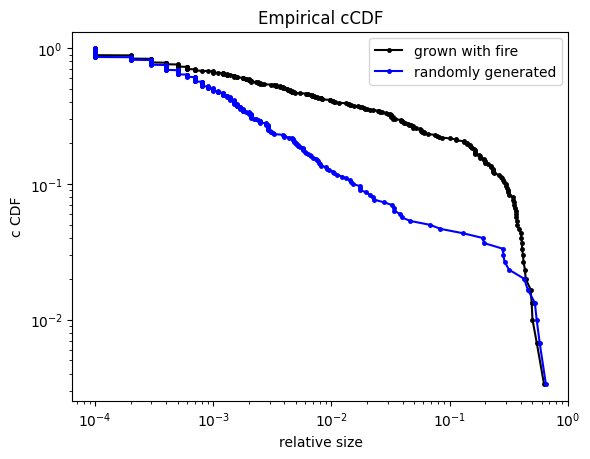

In [23]:
c_CDF, s_rel = complementary_CDF(fire_size, forest.size)

c_CDF_rf, s_rel_rf = complementary_CDF(rf_fire_size, forest.size)


plt.loglog(s_rel, c_CDF, '.-', color='k', markersize=5,
           label='grown with fire')
plt.loglog(s_rel_rf, c_CDF_rf, '.-', color='b', markersize=5,
           label='randomly generated')

plt.legend()

plt.title('Empirical cCDF')

plt.xlabel('relative size')
plt.ylabel('c CDF')

plt.show()

### cCDF and power law trends

The central region (in this case: relative size of the fire between $10^{-3}$ and $10^{-1}$) has the trend of a **power law**.

In fact, if the probability distribution has an exponent $\alpha$

$$
P(x) \sim x^{-\alpha} \quad \quad {\rm with} \quad \alpha > 1 \quad {\rm and} \quad x \in \left\lbrack x_{0}, \infty \right\lbrack
$$

the complementary CDF has an exponent $1-\alpha$

$$
C(x) \sim x^{1-\alpha} \quad \quad {\rm with} \quad \alpha > 1 \quad {\rm and} \quad x \in \left\lbrack x_{0}, \infty \right\lbrack
$$

Let's determine the exponent for the empirical cCDF by a linear fit

In [24]:
min_rel_size = 1e-3
max_rel_size = 1e-1


is_min = np.searchsorted(s_rel, min_rel_size)
is_max = np.searchsorted(s_rel, max_rel_size)

# Note!!! The linear dependence is between the logarithms
p = np.polyfit(np.log(s_rel[is_min:is_max]),
               np.log(c_CDF[is_min:is_max]), 1)

beta = p[0]
print(f'The empirical cCDF has an exponent beta = {beta:.4}')

alpha = 1 - beta

print(f'The empirical prob. distr. exponent: -alpha')
print(f'with alpha = {alpha:.4}')

The empirical cCDF has an exponent beta = -0.2391
The empirical prob. distr. exponent: -alpha
with alpha = 1.239


Let's compare with a **synthetic sequence** of fire sizes drawn from a power law probability distribution with exponent $-\alpha$

Implement a function that draws number according to the correct probability distribution, starting from the function that draws random numbers from the flat distribution in $\left\lbrack0, 1 \right\rbrack$ 

In [25]:
def powerlaw_random(alpha, x_min, num_drawings):
    """
    Function that returns numbers drawn from a probability distribution
    P(x) ~ x ** (- alpha) starting from random numbers in [0, 1].
    
    Parameters
    ==========
    alpha : Exponent of the probability distribution. Must be > 1.
    x_min : Minimum value of the domain of P(x).
    num_drawings : Integer. Numbers of random numbers generated. 
    """
    
    if alpha <= 1:
        raise ValueError('alpha must be > 1')

    if x_min <= 0:
        raise ValueError('x_min must be > 0')

            
    r = np.random.rand(num_drawings)
    
    random_values = x_min * r ** (1 / (1 - alpha))

    return random_values

### Fitting of the exponent of the empirical cCDF

We fit the exponent of the linear part of the cCDF and then we compare with synthetic data generated with the same power law.

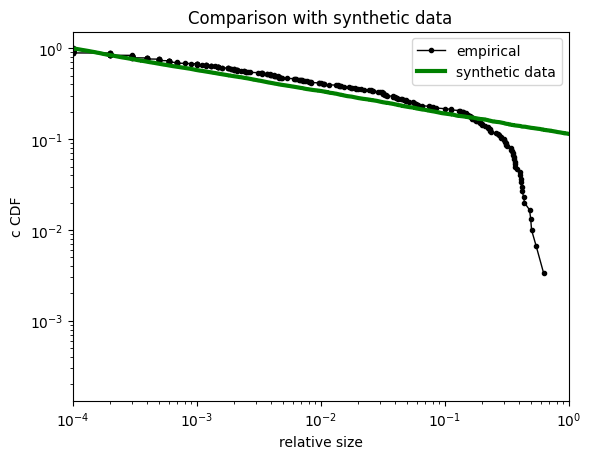

In [26]:
x_min = 1  # minimum value for the generated numbers
num_drawings = 5000  

pl_size = powerlaw_random(alpha, x_min, num_drawings)

c_CDF_pl, s_rel_pl = complementary_CDF(pl_size, forest.size)

# Note loglog plot!
plt.loglog(s_rel, c_CDF, '.-', color='k', linewidth=1, 
           label='empirical')
plt.loglog(s_rel_pl, c_CDF_pl, '-', color='g', linewidth=3, 
           label='synthetic data')

plt.xlim([min(s_rel), 1])

plt.legend()

plt.title('Comparison with synthetic data')

plt.xlabel('relative size')
plt.ylabel('c CDF')

plt.show()